In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,PowerTransformer,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [2]:
import pandas as pd
import numpy as np

def generate_kapha_balanced_aligned(n_each=400, seed=123):
    np.random.seed(seed)
    data = []
    
    # Normal Kapha
    for _ in range(n_each):
        row = {
            "Age": np.random.randint(18, 70),
            "Gender": np.random.choice(["Male", "Female"]),
            "SleepQuality": np.random.choice([4,5], p=[0.6,0.4]),
            "StressLevel": np.random.choice([1,2], p=[0.8,0.2]),
            "Appetite": np.random.choice([3,4,5], p=[0.4,0.4,0.2]),
            "EnergyLevel": np.random.choice([3,4,5], p=[0.5,0.3,0.2]),
            "AngerLevel": np.random.choice([1,2], p=[0.8,0.2]),
            "Forgetfulness": np.random.choice([1,2,3], p=[0.5,0.3,0.2]),
            "AnxietyLevel": np.random.choice([1,2,3], p=[0.7,0.2,0.1]),
            "BowelType": np.random.choice(["Regular","Loose","Constipated"], p=[0.8,0.1,0.1]),
            "Cravings": np.random.choice(["Spicy","Sour","Warm","Salty"], p=[0.1,0.1,0.4,0.4]),
            "SkinType": np.random.choice(["Sensitive","Oily","Dry"], p=[0.1,0.7,0.2]),
            "HairType": np.random.choice(["Thick","Brittle","Thin"], p=[0.7,0.2,0.1]),
            "BodyFrame": np.random.choice(["Small","Medium","Large"], p=[0.1,0.4,0.5]),
            "Sweating": np.random.choice(["Low","Medium","High"], p=[0.2,0.5,0.3]),
            "Kapha_Imbalance": "Normal"
        }
        data.append(row)
    
    # Medium Kapha
    for _ in range(n_each):
        row = {
            "Age": np.random.randint(18, 70),
            "Gender": np.random.choice(["Male", "Female"]),
            "SleepQuality": np.random.choice([3,4], p=[0.5,0.5]),
            "StressLevel": np.random.choice([2,3,4], p=[0.4,0.4,0.2]),
            "Appetite": np.random.choice([2,3,4,5], p=[0.2,0.3,0.3,0.2]),
            "EnergyLevel": np.random.choice([2,3,4], p=[0.3,0.5,0.2]),
            "AngerLevel": np.random.choice([1,2,3], p=[0.5,0.3,0.2]),
            "Forgetfulness": np.random.choice([2,3,4], p=[0.3,0.5,0.2]),
            "AnxietyLevel": np.random.choice([1,2,3,4], p=[0.5,0.3,0.15,0.05]),
            "BowelType": np.random.choice(["Regular","Loose","Constipated"], p=[0.6,0.15,0.25]),
            "Cravings": np.random.choice(["Spicy","Sour","Warm","Salty"], p=[0.15,0.1,0.4,0.35]),
            "SkinType": np.random.choice(["Sensitive","Oily","Dry"], p=[0.2,0.6,0.2]),
            "HairType": np.random.choice(["Thick","Brittle","Thin"], p=[0.6,0.3,0.1]),
            "BodyFrame": np.random.choice(["Small","Medium","Large"], p=[0.2,0.5,0.3]),
            "Sweating": np.random.choice(["Low","Medium","High"], p=[0.3,0.5,0.2]),
            "Kapha_Imbalance": "Medium"
        }
        data.append(row)
    
    # High Kapha
    for _ in range(n_each):
        row = {
            "Age": np.random.randint(18, 70),
            "Gender": np.random.choice(["Male", "Female"]),
            "SleepQuality": np.random.choice([1,2,3], p=[0.5,0.3,0.2]),
            "StressLevel": np.random.choice([3,4,5], p=[0.3,0.4,0.3]),
            "Appetite": np.random.choice([4,5], p=[0.6,0.4]),  # heavy appetite
            "EnergyLevel": np.random.choice([1,2,3], p=[0.5,0.3,0.2]),
            "AngerLevel": np.random.choice([2,3], p=[0.6,0.4]),
            "Forgetfulness": np.random.choice([3,4,5], p=[0.4,0.4,0.2]),  # foggy mind
            "AnxietyLevel": np.random.choice([2,3,4], p=[0.5,0.3,0.2]),
            "BowelType": np.random.choice(["Regular","Loose","Constipated"], p=[0.3,0.1,0.6]),
            "Cravings": np.random.choice(["Spicy","Sour","Warm","Salty"], p=[0.1,0.1,0.4,0.4]),
            "SkinType": np.random.choice(["Sensitive","Oily","Dry"], p=[0.1,0.8,0.1]),
            "HairType": np.random.choice(["Thick","Brittle","Thin"], p=[0.8,0.15,0.05]),
            "BodyFrame": np.random.choice(["Small","Medium","Large"], p=[0.1,0.3,0.6]),
            "Sweating": np.random.choice(["Low","Medium","High"], p=[0.2,0.5,0.3]),
            "Kapha_Imbalance": "High"
        }
        data.append(row)
    
    return pd.DataFrame(data)

# Example usage:
df_kapha_aligned = generate_kapha_balanced_aligned(n_each=400, seed=101)
df_kapha_aligned.to_excel("kapha_imbalance_dataset.xlsx", index=False)

In [3]:
df=pd.read_excel('kapha_imbalance_dataset.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              1200 non-null   int64 
 1   Gender           1200 non-null   object
 2   SleepQuality     1200 non-null   int64 
 3   StressLevel      1200 non-null   int64 
 4   Appetite         1200 non-null   int64 
 5   EnergyLevel      1200 non-null   int64 
 6   AngerLevel       1200 non-null   int64 
 7   Forgetfulness    1200 non-null   int64 
 8   AnxietyLevel     1200 non-null   int64 
 9   BowelType        1200 non-null   object
 10  Cravings         1200 non-null   object
 11  SkinType         1200 non-null   object
 12  HairType         1200 non-null   object
 13  BodyFrame        1200 non-null   object
 14  Sweating         1200 non-null   object
 15  Kapha_Imbalance  1200 non-null   object
dtypes: int64(8), object(8)
memory usage: 150.1+ KB


In [4]:
df

,Age,Gender,SleepQuality,StressLevel,Appetite,EnergyLevel,AngerLevel,Forgetfulness,AnxietyLevel,BowelType,Cravings,SkinType,HairType,BodyFrame,Sweating,Kapha_Imbalance
0,49,Female,4,1,3,4,2,1,2,Regular,Sour,Oily,Thick,Medium,High,Normal
1,26,Female,4,1,4,4,1,2,1,Regular,Sour,Oily,Thin,Large,Medium,Normal
2,25,Male,4,2,5,3,1,3,1,Loose,Salty,Oily,Thin,Small,Low,Normal
3,37,Male,4,1,4,3,1,1,1,Regular,Spicy,Oily,Thick,Medium,Medium,Normal
4,46,Female,4,1,4,5,2,1,1,Regular,Warm,Oily,Thick,Large,High,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,61,Female,1,3,4,2,3,4,4,Constipated,Sour,Oily,Thick,Large,Medium,High
1196,43,Female,3,4,4,3,2,3,3,Constipated,Warm,Oily,Thick,Large,Medium,High
1197,19,Female,1,4,4,1,2,3,2,Constipated,Sour,Oily,Thick,Large,Medium,High
1198,30,Male,1,4,4,3,3,4,3,Constipated,Warm,Oily,Thick,Medium,High,High


In [5]:
df["Sweating"].unique()

array(['High', 'Medium', 'Low'], dtype=object)

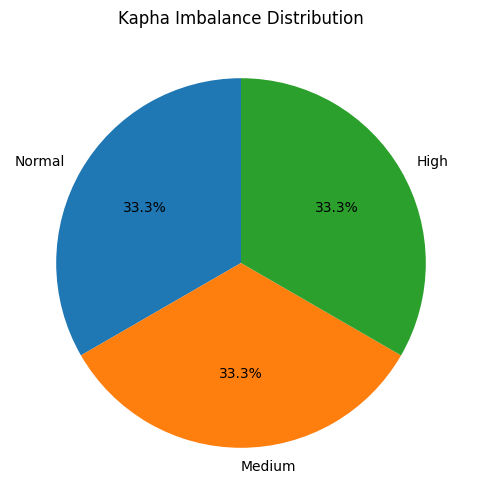

In [6]:
import matplotlib.pyplot as plt

# Count values
counts = df["Kapha_Imbalance"].value_counts()

# Plot pie chart
counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6,6))
plt.title("Kapha Imbalance Distribution")
plt.ylabel("")  # Remove y-label for cleaner look
plt.show()


In [7]:
X = df.drop("Kapha_Imbalance", axis=1)
y = df["Kapha_Imbalance"]

In [8]:
numeric_features = ["Age","SleepQuality","StressLevel","Appetite","EnergyLevel","AngerLevel","Forgetfulness","AnxietyLevel"]
categorical_features = [
    "Gender","BowelType","Cravings","SkinType","HairType",
    "BodyFrame","Sweating",
    
]

In [9]:
preprocessor = ColumnTransformer(transformers=[
    ("num", "passthrough", numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features)
])


In [10]:
# Define mapping
label_mapping = {
    "Normal": 0,
    "Medium": 1,
    "High": 2
}

# Apply mapping
y_encoded = y.map(label_mapping)  
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42)


In [11]:
xgb_model = XGBClassifier(
    objective="multi:softmax",
    num_class=len(np.unique(y_encoded)),
    eval_metric="mlogloss",
    learning_rate=0.05,
    max_depth=8,
    n_estimators=800,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=2,
    reg_alpha=1,
    random_state=42,
    use_label_encoder=False
)

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", xgb_model)
])

In [12]:
model.fit(X_train,y_train)

C:\Users\Rajveer Gupta\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:27:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Age', 'SleepQuality',
                                                   'StressLevel', 'Appetite',
                                                   'EnergyLevel', 'AngerLevel',
                                                   'Forgetfulness',
                                                   'AnxietyLevel']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'BowelType',
                                                   'Cravings', 'SkinType',
                                                   'HairType', 'BodyFrame',
                                                   'Sweating'])])),
                ('classif...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=800, n_jobs=None, num_class=3, ...))])

In [13]:
y_pred =model.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred)

0.9833333333333333

In [15]:
test_input = pd.DataFrame([{
    "Age": 20,
    "Gender": "Male",
    "SleepQuality": 3,
    "StressLevel": 3,
    "Appetite": 3,
    "EnergyLevel": 3,
    "AngerLevel": 2,
    "Forgetfulness": 3,
    "AnxietyLevel": 3,
    "BowelType": "Constipated",
    "Cravings": "Spicy",
    "SkinType": "Dry",
    "HairType": "Brittle",
    "BodyFrame": "Small",
    "Sweating": "Low",
}])
y_pred=model.predict(test_input)

In [16]:
y_pred

array([1])

In [17]:
import pickle

with open("kapha_model.pkl", 'wb') as f:
    pickle.dump(model, f)
